In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')
%matplotlib inline
from pandas_datareader.data import DataReader
from datetime import datetime

<IPython.core.display.Javascript object>

In [2]:
hist_quotes_df=pd.read_csv('HistoricalQuotes.csv')

In [3]:
hist_quotes_df.head()

,Date,Close/Last,Volume,Open,High,Low
0,02/28/2020,$273.36,106721200,$257.26,$278.41,$256.37
1,02/27/2020,$273.52,80151380,$281.1,$286,$272.96
2,02/26/2020,$292.65,49678430,$286.53,$297.88,$286.5
3,02/25/2020,$288.08,57668360,$300.95,$302.53,$286.13
4,02/24/2020,$298.18,55548830,$297.26,$304.18,$289.23


In [4]:
tech_list=['AAPL','GOOG','MSFT','AMZN']

end=datetime.now()

start=datetime(end.year-1,end.month,end.day)

for stock in tech_list:
    globals()[stock]=DataReader(stock,'yahoo',start,end)

In [5]:
stock

'AMZN'

In [6]:
globals()[stock].head()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-11-11,1780.000000,1767.130005,1778.000000,1771.650024,1946000,1771.650024
2019-11-12,1786.219971,1771.910034,1774.660034,1778.000000,2037600,1778.000000
2019-11-13,1775.000000,1747.319946,1773.390015,1753.109985,2989500,1753.109985
2019-11-14,1766.589966,1749.560059,1751.430054,1754.599976,2264800,1754.599976
2019-11-15,1761.680054,1732.859985,1760.050049,1739.489990,3927600,1739.489990


In [7]:
company_list=[AAPL,GOOG,MSFT,AMZN]
company_name=['APPLE','GOOGLE','MICROSOFT','AMAZON']

for company,comp_name in zip(company_list,company_name):
    company['company_name']=comp_name
df=pd.concat(company_list,axis=0)
df.head()

,High,Low,Open,Close,Volume,Adj Close,company_name
Date,,,,,,,
2019-11-11,65.617500,64.570000,64.574997,65.550003,81821200.0,64.460991,APPLE
2019-11-12,65.697502,65.230003,65.387497,65.489998,87388800.0,64.401978,APPLE
2019-11-13,66.195000,65.267502,65.282501,66.117500,102734400.0,65.019051,APPLE
2019-11-14,66.220001,65.525002,65.937500,65.660004,89182800.0,64.569160,APPLE
2019-11-15,66.445000,65.752502,65.919998,66.440002,100206400.0,65.336212,APPLE


In [8]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,254.000000,254.000000,254.000000,254.000000,2.540000e+02,254.000000
mean,88.923199,86.417155,87.648051,87.744517,1.540425e+08,87.084973
std,20.586264,19.779206,20.381773,20.149441,7.280468e+07,20.494234
min,57.125000,53.152500,57.020000,56.092499,2.880380e+07,55.291519
25%,71.520624,69.748127,70.514376,71.016874,1.061153e+08,69.837036
50%,80.855000,79.353748,80.098751,79.954998,1.369334e+08,79.243618
75%,111.901873,108.263748,109.705002,109.963125,1.852396e+08,109.576170
max,137.979996,130.529999,137.589996,134.179993,4.268848e+08,133.948898


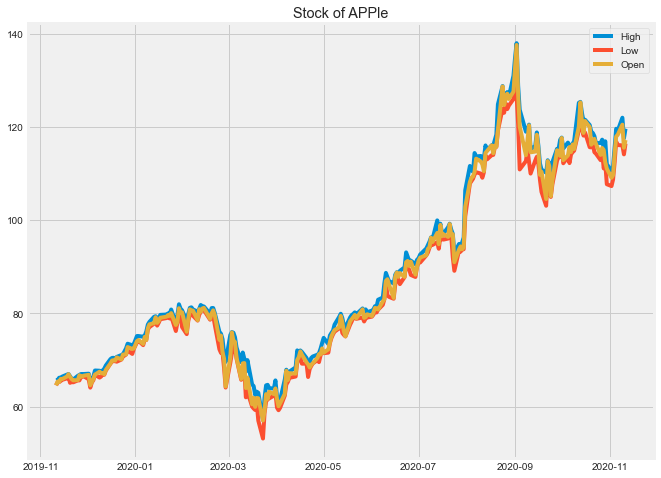

In [9]:
pl.figure(figsize=(10,8))
pl.title('Stock of APPle')
pl.plot(AAPL['High'],label='High')
pl.plot(AAPL['Low'],label='Low')
pl.plot(AAPL['Open'],label='Open')
pl.legend()

In [10]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 254 entries, 2019-11-11 to 2020-11-11
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   High          254 non-null    float64
 1   Low           254 non-null    float64
 2   Open          254 non-null    float64
 3   Close         254 non-null    float64
 4   Volume        254 non-null    float64
 5   Adj Close     254 non-null    float64
 6   company_name  254 non-null    object 
dtypes: float64(6), object(1)
memory usage: 15.9+ KB


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

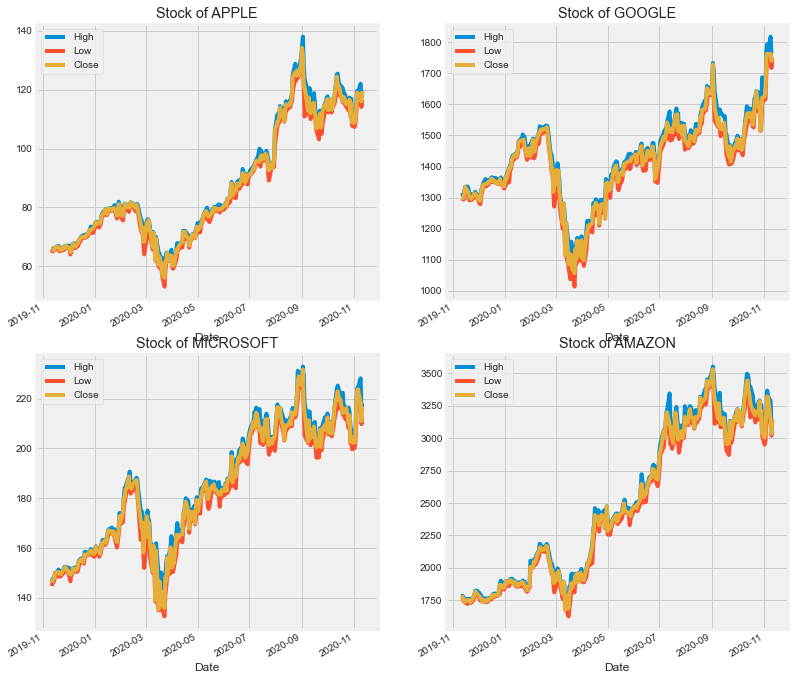

In [11]:
plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i,j  in enumerate(df['company_name'].unique(),1):
#     pl.figure(figsize=(10,8))
    pl.subplot(2,2,i)
    pl.title('Stock of {}'.format(j))
    df[df['company_name']==j]['High'].plot()
    df[df['company_name']==j]['Low'].plot()
    df[df['company_name']==j]['Close'].plot()

    pl.legend()
pl.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

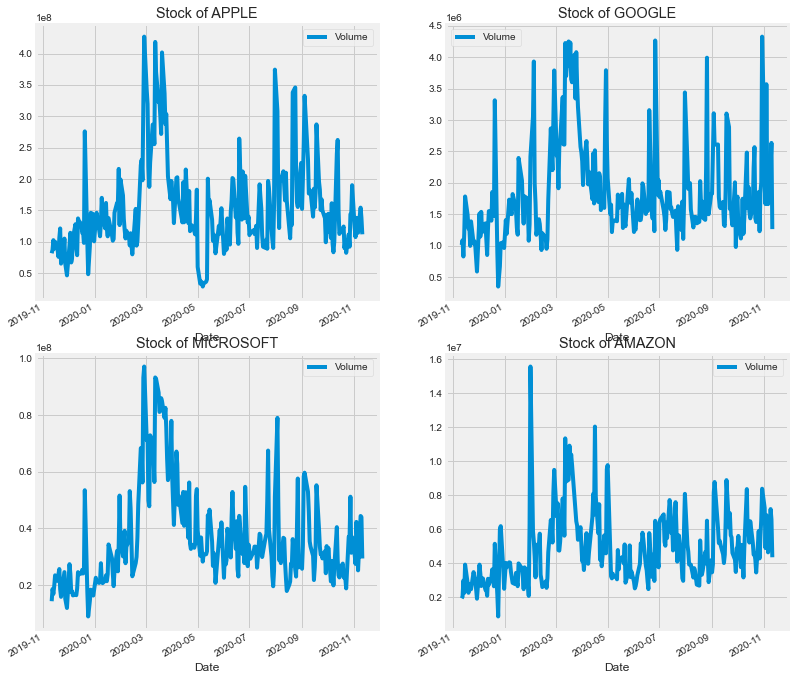

In [12]:
plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i,j  in enumerate(df['company_name'].unique(),1):
#     pl.figure(figsize=(10,8))
    pl.subplot(2,2,i)
    pl.title('Stock of {}'.format(j))
    df[df['company_name']==j]['Volume'].plot()


    pl.legend()
pl.show()

In [13]:
ma_day=[10,20,50]
for ma in ma_day:
    for company in company_list:
        column_name=f"MA for {ma}days"
        company[column_name]=company['Adj Close'].rolling(ma).mean()

In [14]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close,company_name,MA for 10days,MA for 20days,MA for 50days
Date,,,,,,,,,,
2019-11-11,65.617500,64.570000,64.574997,65.550003,81821200.0,64.460991,APPLE,NaN,NaN,NaN
2019-11-12,65.697502,65.230003,65.387497,65.489998,87388800.0,64.401978,APPLE,NaN,NaN,NaN
2019-11-13,66.195000,65.267502,65.282501,66.117500,102734400.0,65.019051,APPLE,NaN,NaN,NaN
2019-11-14,66.220001,65.525002,65.937500,65.660004,89182800.0,64.569160,APPLE,NaN,NaN,NaN
2019-11-15,66.445000,65.752502,65.919998,66.440002,100206400.0,65.336212,APPLE,NaN,NaN,NaN


In [15]:
GOOG.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'company_name',
       'MA for 10days', 'MA for 20days', 'MA for 50days'],
      dtype='object')

company_name
AMAZON       [[AxesSubplot(0.08,0.670278;0.378261x0.209722)...
APPLE        [[AxesSubplot(0.08,0.670278;0.378261x0.209722)...
GOOGLE       [[AxesSubplot(0.08,0.670278;0.378261x0.209722)...
MICROSOFT    [[AxesSubplot(0.08,0.670278;0.378261x0.209722)...
dtype: object

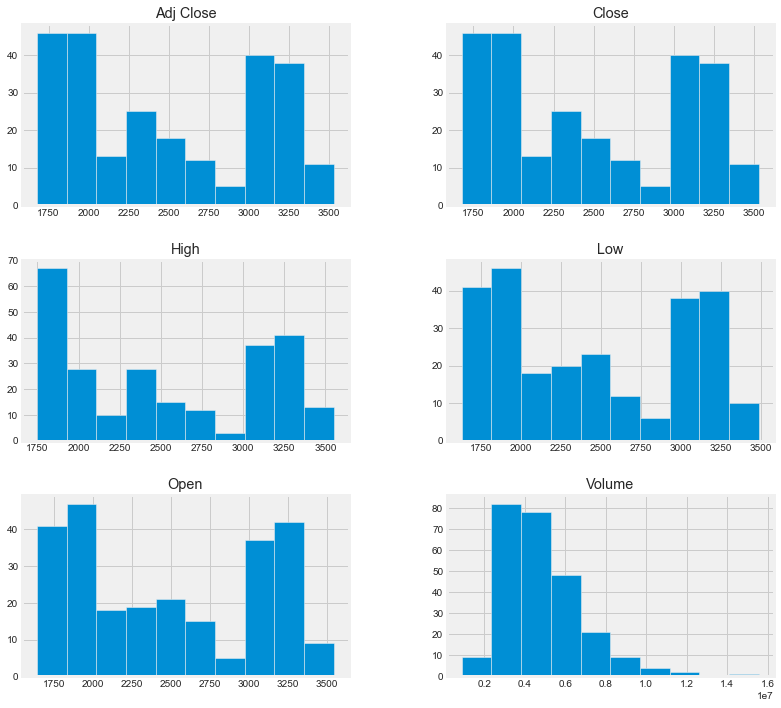

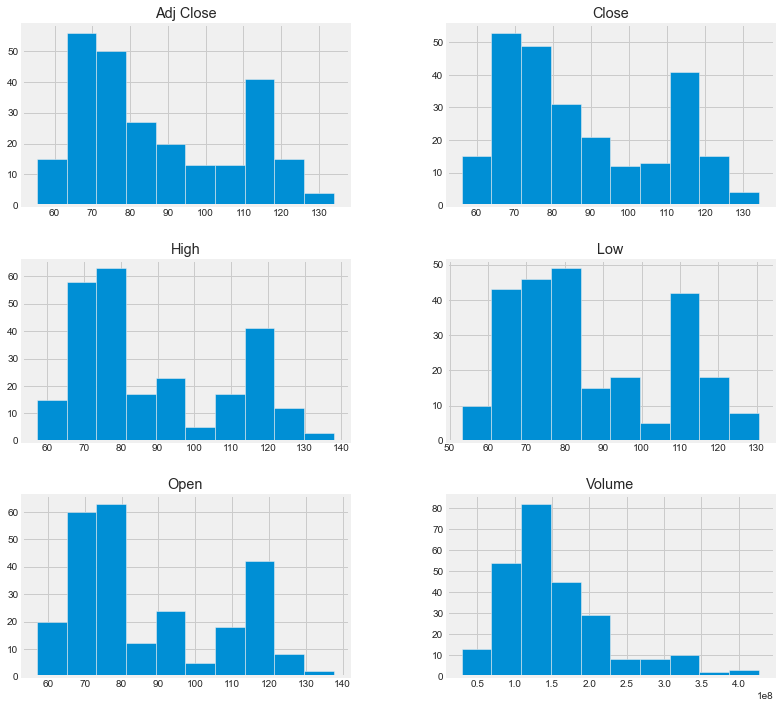

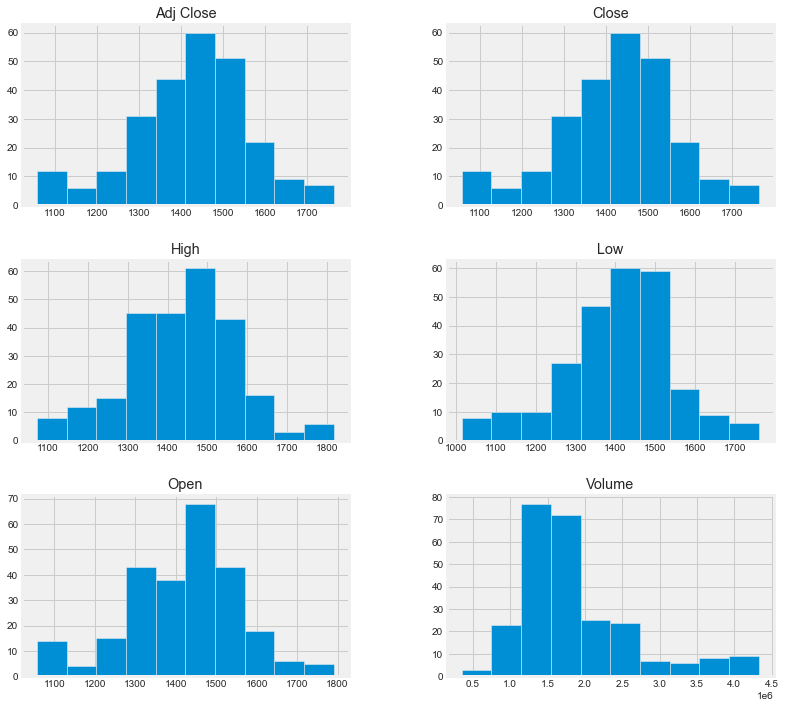

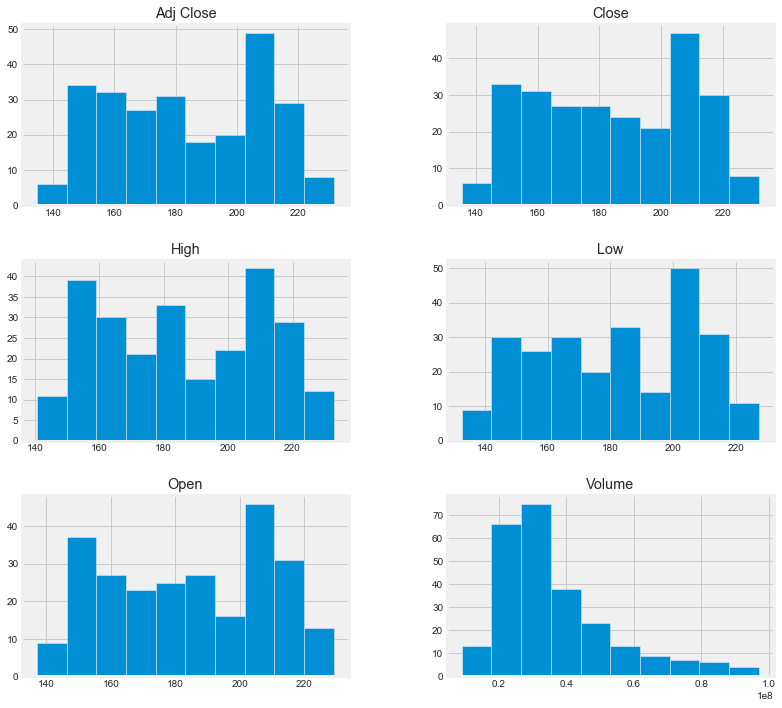

In [16]:
df.groupby('company_name').hist(figsize=(12,12))

<IPython.core.display.Javascript object>

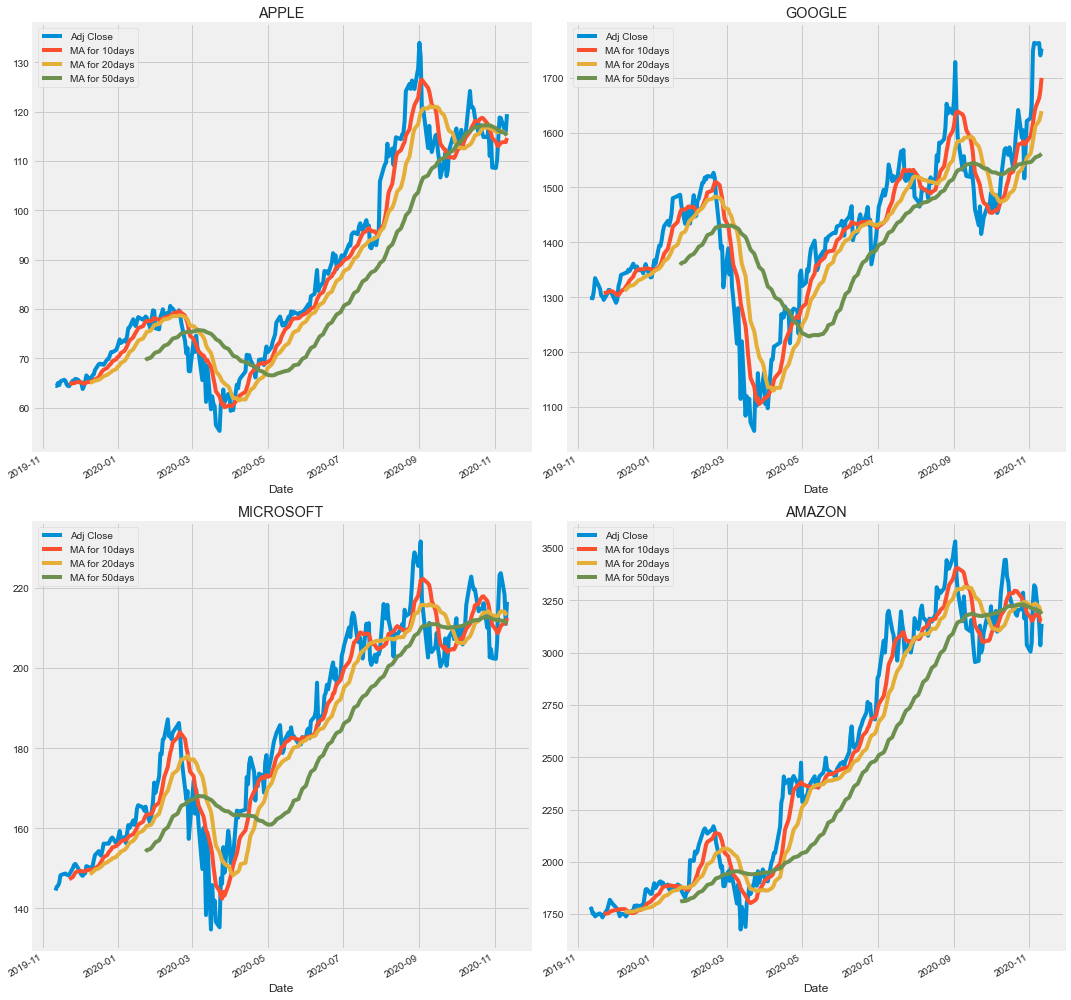

In [18]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(14)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10days', 'MA for 20days', 'MA for 50days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10days', 'MA for 20days', 'MA for 50days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10days', 'MA for 20days', 'MA for 50days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10days', 'MA for 20days', 'MA for 50days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

In [ ]:
for company in company_list:
    company['Daily Return']=company['Adj Close'].pct_change()